In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt 
import random
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D ,MaxPooling2D, Dense,Flatten

In [3]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class CatsDogsDataset(Dataset):
    """Custom Dataset for loading cat/dog images"""

    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_names = [fname for fname in os.listdir(img_dir) if fname.endswith('.jpg')]
        self.transform = transform

    def __getitem__(self, index):
        img_name = self.img_names[index]
        img_path = os.path.join(self.img_dir, img_name)
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        label = img_name.split('.')[0]  # Extract the label from the filename
        return img, label

    def __len__(self):
        return len(self.img_names)

# Define the data transformations
data_transforms = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the images to a fixed size
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image tensors
])

# Create train dataset
train_dataset = CatsDogsDataset(img_dir=r"C:\Users\Shreya\Desktop\jupyter_notebook\dogs-vs-cats\train", transform=data_transforms)
print(len(train_dataset)) 
# Create train dataloader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Create test dataset
test_dataset = CatsDogsDataset(img_dir=r'C:/Users/Shreya/Desktop/jupyter_notebook/dogs-vs-cats\test', transform=data_transforms)

# Create test dataloader
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


20000


(397, 500, 3)
C:/Users/Shreya/Desktop/jupyter_notebook/dogs-vs-cats\train\dog.100.jpg
C:/Users/Shreya/Desktop/jupyter_notebook/dogs-vs-cats\train\dog
dog


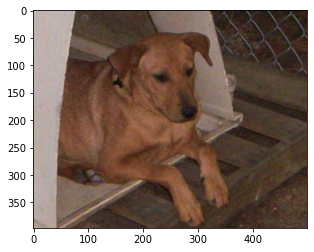

In [4]:
img_path = os.path.join('C:/Users/Shreya/Desktop/jupyter_notebook/dogs-vs-cats', 'train', 'dog.100.jpg')
img = Image.open(img_path)
print(np.asarray(img, dtype=np.uint8).shape)
plt.imshow(img)

print(img_path)
print(img_path.split('.')[0])
label=img_path.split('.')[0]
if label == r'C:/Users/Shreya/Desktop/jupyter_notebook/dogs-vs-cats\train\cat':
    print("cat")
            
else:
    print("dog")



In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Define your CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Instantiate your CNN model
model = CNNModel()

# Initialize training parameters
epochs = 20
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define label encoding dictionary
label_encoding = {'cat': 0, 'dog': 1}

# Train the model
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0.0
    epoch_correct = 0
    epoch_total = 0

    for images, labels in tqdm(train_loader):
        optimizer.zero_grad()  # Clear gradients

        # Convert labels to numerical format
        encoded_labels = torch.tensor([label_encoding[label] for label in labels])

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, encoded_labels.unsqueeze(1).float())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate training statistics
        predicted = torch.round(outputs)
        epoch_loss += loss.item() * images.size(0)
        epoch_correct += (predicted == encoded_labels).sum().item()
        epoch_total += encoded_labels.size(0)

    # Calculate epoch-level statistics
    epoch_loss /= len(train_dataset)
    epoch_accuracy = epoch_correct / epoch_total

    # Print epoch results
    print('Epoch [{}/{}]: Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch + 1, epochs, epoch_loss, epoch_accuracy * 100))

# Evaluate the model on the test dataset
model.eval()  # Set the model to evaluation mode
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:
        # Convert labels to numerical format
        encoded_labels = torch.tensor([label_encoding[label] for label in labels])

        outputs = model(images)
        predicted = torch.round(outputs)

        test_total += encoded_labels.size(0)
        test_correct += (predicted == encoded_labels).sum().item()

test_accuracy = test_correct / test_total
print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [08:23<00:00,  3.20s/it]


Epoch [1/20]: Loss: 0.5949, Accuracy: 6428.49%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:03<00:00,  1.17s/it]


Epoch [2/20]: Loss: 0.4954, Accuracy: 6421.67%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [02:55<00:00,  1.12s/it]


Epoch [3/20]: Loss: 0.4457, Accuracy: 6410.34%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [02:55<00:00,  1.12s/it]


Epoch [4/20]: Loss: 0.4068, Accuracy: 6417.57%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:24<00:00,  1.30s/it]


Epoch [5/20]: Loss: 0.3660, Accuracy: 6438.91%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:02<00:00,  1.16s/it]


Epoch [6/20]: Loss: 0.3246, Accuracy: 6424.18%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:28<00:00,  1.33s/it]


Epoch [7/20]: Loss: 0.2864, Accuracy: 6441.58%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:35<00:00,  1.37s/it]


Epoch [8/20]: Loss: 0.2420, Accuracy: 6442.97%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:03<00:00,  1.17s/it]


Epoch [9/20]: Loss: 0.1897, Accuracy: 6440.33%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:07<00:00,  1.20s/it]


Epoch [10/20]: Loss: 0.1386, Accuracy: 6436.23%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:24<00:00,  1.30s/it]


Epoch [11/20]: Loss: 0.0991, Accuracy: 6444.08%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:28<00:00,  1.33s/it]


Epoch [12/20]: Loss: 0.0535, Accuracy: 6437.25%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:32<00:00,  1.35s/it]


Epoch [13/20]: Loss: 0.0318, Accuracy: 6434.01%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:39<00:00,  1.40s/it]


Epoch [14/20]: Loss: 0.0201, Accuracy: 6441.62%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:24<00:00,  1.30s/it]


Epoch [15/20]: Loss: 0.0102, Accuracy: 6447.13%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:17<00:00,  1.26s/it]


Epoch [16/20]: Loss: 0.0083, Accuracy: 6444.23%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [03:00<00:00,  1.15s/it]


Epoch [17/20]: Loss: 0.0038, Accuracy: 6447.61%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [02:59<00:00,  1.15s/it]


Epoch [18/20]: Loss: 0.0029, Accuracy: 6432.04%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [02:41<00:00,  1.03s/it]


Epoch [19/20]: Loss: 0.0017, Accuracy: 6444.89%


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [02:24<00:00,  1.09it/s]


Epoch [20/20]: Loss: 0.0021, Accuracy: 6437.02%
Test Accuracy: 9837.76%


In [8]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from tqdm import tqdm

# # Initialize training parameters
# epochs = 10
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Define label encoding dictionary
# label_encoding = {'cat': 0, 'dog': 1}

# # Train the model
# for epoch in range(epochs):
#     model.train()  # Set the model to training mode
#     epoch_loss = 0.0
#     epoch_correct = 0
#     epoch_total = 0

#     for images, labels in tqdm(train_loader):
#         optimizer.zero_grad()  # Clear gradients

#         # Convert labels to numerical format
#         encoded_labels = torch.tensor([label_encoding[label] for label in labels])

#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, encoded_labels.unsqueeze(1).float())

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()

#         # Calculate training statistics
#         predicted = torch.round(outputs)
#         epoch_loss += loss.item() * images.size(0)
#         epoch_correct += (predicted == encoded_labels).sum().item()
#         epoch_total += encoded_labels.size(0)

#     # Calculate epoch-level statistics
#     epoch_loss /= len(train_dataset)
#     epoch_accuracy = epoch_correct / epoch_total

#     # Print epoch results
#     print('Epoch [{}/{}]: Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch + 1, epochs, epoch_loss, epoch_accuracy * 100))

# # Evaluate the model on the test dataset
# model.eval()  # Set the model to evaluation mode
# test_correct = 0
# test_total = 0

# with torch.no_grad():
#     for images, labels in test_loader:
#         # Convert labels to numerical format
#         encoded_labels = torch.tensor([label_encoding[label] for label in labels])

#         outputs = model(images)
#         predicted = torch.round(outputs)

#         test_total += encoded_labels.size(0)
#         test_correct += (predicted == encoded_labels).sum().item()

# test_accuracy = test_correct / test_total
# print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


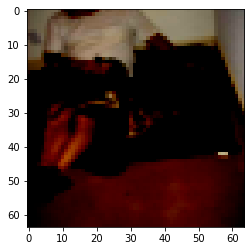

Our model predicts it is a: dog


In [12]:
import random
import matplotlib.pyplot as plt

# Generate a random index for visualization
idx2 = random.randint(0, len(test_dataset) - 1)

# Get the image and true label
image, label = test_dataset[idx2]

# Display the image
plt.imshow(image.permute(1, 2, 0))
plt.show()

# Make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Reshape the image and pass it through the model
    image = image.unsqueeze(0)
    outputs = model(image)
    predicted = torch.round(outputs)

# Decode the predicted label
if predicted.item() == 0:
    pred = 'cat'
else:
    pred = 'dog'

# Print the prediction
print("Our model predicts it is a:", pred)


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        # Convert labels to numerical format
        encoded_labels = torch.tensor([label_encoding[label] for label in labels])

        # Forward pass
        outputs = model(images)
        predicted = torch.round(outputs)

        # Append true and predicted labels to the lists
        true_labels.extend(encoded_labels.numpy().tolist())
        predicted_labels.extend(predicted.numpy().tolist())

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1-score: {:.4f}'.format(f1))


Precision: 0.7801
Recall: 0.8088
F1-score: 0.7942
